# Global PAth vars

In [2]:
#PATH 
base_path = "drive/MyDrive/Pammy_Alzheimers_Disease_Prediction/Dataset/Alzheimers_Dataset/"
train = f"{base_path}train/"
test = f"{base_path}test/"
Save = f"drive/MyDrive/Pammy_Alzheimers_Disease_Prediction/Visualisation/"

base_path_bin = "drive/MyDrive/Pammy_Alzheimers_Disease_Prediction/Dataset/Alzheimers_Dataset_Binary/"
train_bin = f"{base_path_bin}train/" 
test_bin = f"{base_path_bin}test/"
Save_bin = f"drive/MyDrive/Pammy_Alzheimers_Disease_Prediction/Visualisation/BinaryClassification/"


# Setup

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version 2.8.2
Running on TPU  ['10.32.13.26:8470']
INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.32.13.26:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.32.13.26:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [ ]:
AUTO = tf.data.experimental.AUTOTUNE

# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install -U tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os, time

#arr operations
import numpy as np

# Progress Bar
from tqdm import tqdm

# Evaluation metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

#Importing Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D
from keras.layers import GlobalAveragePooling2D, Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler, Callback, ReduceLROnPlateau
from keras import optimizers, Input
from keras.utils.vis_utils import plot_model
from keras.applications.imagenet_utils import decode_predictions
import tensorflow_addons as tfa
import keras.backend as K


#Pretrained models
from keras.applications.xception import Xception
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.resnet import ResNet50
from keras.applications.resnet_v2 import ResNet152V2
#from keras.applications.resnet152_v2 import ResNet152V2


#Image read and show
import skimage.io
from skimage.io import imread, imshow
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('darkgrid')
#plt.style.use('fivethirtyeight')

#Metrics
from sklearn.metrics import f1_score , recall_score, accuracy_score, precision_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, classification_report
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle



# Prepare the data

## Data Generator 

In [ ]:
# Image data generator
training_data_gen = ImageDataGenerator()
testing_data_gen = ImageDataGenerator()

## Splitting the Data

In [ ]:
train_count = 0
for fold in os.listdir(train):
  path = os.path.join(train, fold)
  train_count += len(os.listdir(path))

test_count = 0
for fold in os.listdir(test):
  path = os.path.join(test, fold)
  test_count += len(os.listdir(path))

print(f"Training Image Count : {train_count}")
print(f"Testing Image Count : {test_count}")

Training Image Count : 5121
Testing Image Count : 1279


In [ ]:
training_data = training_data_gen.flow_from_directory(
    directory= train,
    target_size = (80,80),
    class_mode = 'categorical',
    subset = 'training',
    batch_size = train_count)

testing_data =  testing_data_gen.flow_from_directory(
  directory = test,
  target_size = (80,80),
  class_mode = 'categorical',
  batch_size = test_count,
)

Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.


In [ ]:
X,y = training_data.next()

In [ ]:
X_test, y_test = testing_data.next()

In [ ]:
y = np.argmax(y, axis= 1)
y = y.reshape(-1, 1).copy()
y_test = np.argmax(y_test, axis = 1)
y_test = y_test.reshape(-1, 1).copy()

print(f"Training Image Dataset Shape : {X.shape} , Label shape : {y.shape}")
print(f"Testing Image Dataset Shape : {X_test.shape} , Label shape : {y_test.shape}")

Training Image Dataset Shape : (5121, 80, 80, 3) , Label shape : (5121, 1)
Testing Image Dataset Shape : (1279, 80, 80, 3) , Label shape : (1279, 1)


In [ ]:
num_classes = 4
input_shape = (80, 80, 3)

In [ ]:
# (x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()

# print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
# print(f"x_test shape: {x_test.shape} - y_test shape: {y_test.shape}")


In [ ]:
# print(f"Training data shape : {x_train.shape}")
# print(f"Testing data shape : {x_test.shape}")
# print(f"Training label shape : {y_train.shape}")
# print(f"Testing label shape : {y_test.shape}")

## Configure the hyperparameters

In [ ]:
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 256
num_epochs = 100
image_size = 80  # We'll resize input images to this size
patch_size = 6  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [2048, 1024]  # Size of the dense layers of the final classifier


## Use data augmentation

In [ ]:
data_augmentation = keras.Sequential(
    [
        keras.layers.Normalization(),
        keras.layers.Resizing(image_size, image_size),
        keras.layers.RandomFlip("horizontal"),
        keras.layers.RandomRotation(factor=0.02),
        keras.layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(X)


NameError: ignored

## Implement multilayer perceptron (MLP)

In [ ]:

def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = Dense(units, activation=tf.nn.gelu)(x)
        x = Dropout(dropout_rate)(x)
    return x


## Implement patch creation as a layer

In [ ]:

class Patches(keras.layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches


Let's display patches for a sample image

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
image = X[np.random.choice(range(X.shape[0]))]
plt.imshow(image.astype("uint8"))
plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype("uint8"), cmap='gray', vmin=0, vmax=1)
    plt.axis("off")

## Implement the patch encoding layer

The `PatchEncoder` layer will linearly transform a patch by projecting it into a
vector of size `projection_dim`. In addition, it adds a learnable position
embedding to the projected vector.

In [ ]:

class PatchEncoder(keras.layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = Dense(units=projection_dim)
        self.position_embedding = keras.layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded


## Build the ViT model

The ViT model consists of multiple Transformer blocks,
which use the `layers.MultiHeadAttention` layer as a self-attention mechanism
applied to the sequence of patches. The Transformer blocks produce a
`[batch_size, num_patches, projection_dim]` tensor, which is processed via an
classifier head with softmax to produce the final class probabilities output.

Unlike the technique described in the [paper](https://arxiv.org/abs/2010.11929),
which prepends a learnable embedding to the sequence of encoded patches to serve
as the image representation, all the outputs of the final Transformer block are
reshaped with `layers.Flatten()` and used as the image
representation input to the classifier head.
Note that the `layers.GlobalAveragePooling1D` layer
could also be used instead to aggregate the outputs of the Transformer block,
especially when the number of patches and the projection dimensions are large.

In [ ]:

def create_vit_classifier():
    inputs = keras.layers.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = keras.layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = keras.layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = keras.layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = keras.layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = keras.layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = keras.layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = Flatten()(representation)
    representation = Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = Dense(num_classes)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model


## Compile, train, and evaluate the mode

In [ ]:
def run_experiment(model):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )

    checkpoint_filepath = f"{Save}vit/checkpoint"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    model.summary()
    history = model.fit(
        x=X,
        y=y,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.1,
        callbacks=[checkpoint_callback],
    )

    #model.load_weights(checkpoint_filepath)
    _, accuracy, top_5_accuracy = model.evaluate(X_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return history


vit_classifier = create_vit_classifier()
history = run_experiment(vit_classifier)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 80, 80, 3)]  0           []                               
                                                                                                  
 data_augmentation (Sequential)  (None, 80, 80, 3)   7           ['input_1[0][0]']                
                                                                                                  
 patches_1 (Patches)            (None, None, 108)    0           ['data_augmentation[0][0]']      
                                                                                                  
 patch_encoder (PatchEncoder)   (None, 169, 64)      17792       ['patches_1[0][0]']              
                                                                                              

In [ ]:
vit_classifier.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 80, 80, 3)]  0           []                               
                                                                                                  
 data_augmentation (Sequential)  (None, 80, 80, 3)   7           ['input_1[0][0]']                
                                                                                                  
 patches_1 (Patches)            (None, None, 108)    0           ['data_augmentation[0][0]']      
                                                                                                  
 patch_encoder (PatchEncoder)   (None, 169, 64)      17792       ['patches_1[0][0]']              
                                                                                              

In [ ]:
def Confusion_Matrix_Heatmap(y_test,y_pred,class_Names, fName, ModelName):
    #Plot the confusion matrix to understand the classification in detail
    CM = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
    ax = sns.heatmap(CM, cmap='Greens', annot=True, fmt='d', xticklabels=class_Names, yticklabels=class_Names)
    plt.title(f'Alzheimer\'s Disease Diagnosis - {ModelName}')
    plt.xlabel('Prediction')
    plt.ylabel('Truth')
    plt.savefig(f"{Save}{fName}")
    #plt.show(ax)

# Plot Evaluation Metrics
sns.set_style('darkgrid')
#plt.style.use('fivethirtyeight')
def Eval_Plot(acc,val_acc, loss,val_loss, path, title):
    
    fig, (ax1,ax2) = plt.subplots(1,2, figsize= (20,5))
    fig.suptitle(f"{title}\n", fontsize = 15)

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy', fontsize = 15)
    ax1.set_xlabel('Epochs', fontsize = 15)
    ax1.set_ylabel('Accuracy', fontsize = 15)
    ax1.legend(['Training', 'Validation'], fontsize = 15)


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss', fontsize = 15)
    ax2.set_xlabel('Epochs', fontsize = 15)
    ax2.set_ylabel('Loss', fontsize = 15)
    ax2.legend(['Training', 'Validation'], fontsize = 15)

    plt.savefig(f"{Save}{path}")

In [ ]:
path = "Vit/loss_acc_1.png"
title = " MODEL'S METRICS VISUALIZATION : Vision Transformer "
Eval_Plot(
    history.history['accuracy'],history.history['val_accuracy'],
    history.history['loss'],history.history['val_loss'],
    path, title
)

NameError: ignored

In [ ]:
prediction_prob = vit_classifier.predict(X_test)
y_pred = np.argmax(prediction_prob, axis = 1)
y_pred = y_pred.reshape(-1, 1).copy()
class_Names = list(testing_data.class_indices.keys())

In [ ]:
print(f"Y prediction shape : {y_pred.shape}")
print(f"Y test shape : {y_test.shape}")
print(f"Raw prediction shape : {prediction_prob.shape}")
print(f"class Names : {class_Names}")

Y prediction shape : (1279, 1)
Y test shape : (1279, 1)
Raw prediction shape : (1279, 4)
class Names : ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


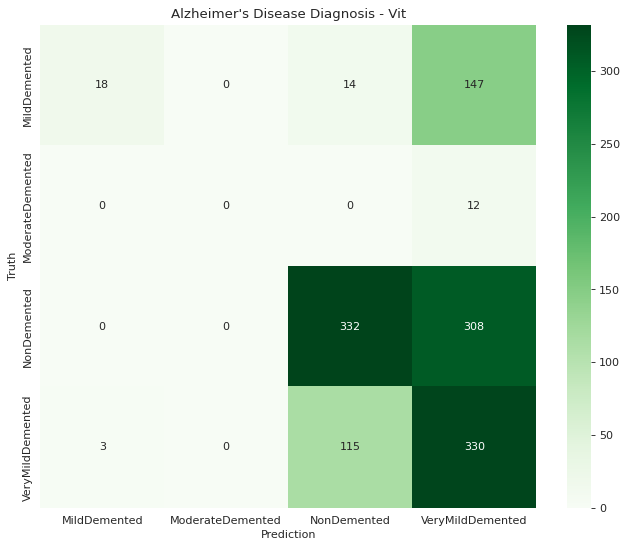

In [ ]:
Confusion_Matrix_Heatmap(y_test, y_pred, class_Names, f"Vit/HeatMap.jpeg", "Vit")

# Vit Keras , fine tuning Vit pretrained on Image net dataset

In [ ]:
!pip install vit-keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Data Generator 

In [ ]:
# Image data generator
training_data_gen = ImageDataGenerator()
testing_data_gen = ImageDataGenerator()

## Splitting the Data

In [ ]:
train_count = 0
for fold in os.listdir(train):
  path = os.path.join(train, fold)
  train_count += len(os.listdir(path))

test_count = 0
for fold in os.listdir(test):
  path = os.path.join(test, fold)
  test_count += len(os.listdir(path))

print(f"Training Image Count : {train_count}")
print(f"Testing Image Count : {test_count}")

Training Image Count : 5121
Testing Image Count : 1279


In [ ]:
training_data = training_data_gen.flow_from_directory(
    directory= train,
    target_size = (112,112),
    class_mode = 'categorical',
    subset = 'training',
    batch_size = train_count)

testing_data =  testing_data_gen.flow_from_directory(
  directory = test,
  target_size = (112,112),
  class_mode = 'categorical',
  batch_size = test_count,
)

Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.


In [ ]:
X,y = training_data.next()

In [ ]:
X_test, y_test = testing_data.next()

In [ ]:
y = np.argmax(y, axis= 1)
y = y.reshape(-1, 1).copy()
y_test = np.argmax(y_test, axis = 1)
y_test = y_test.reshape(-1, 1).copy()

print(f"Training Image Dataset Shape : {X.shape} , Label shape : {y.shape}")
print(f"Testing Image Dataset Shape : {X_test.shape} , Label shape : {y_test.shape}")

Training Image Dataset Shape : (5121, 112, 112, 3) , Label shape : (5121, 1)
Testing Image Dataset Shape : (1279, 112, 112, 3) , Label shape : (1279, 1)


In [ ]:
num_classes = 4
input_shape = (80, 80, 3)

In [ ]:
from vit_keras import vit, utils

image_size = 112
model = vit.vit_b16(
    image_size=image_size,
    activation='sigmoid',
    pretrained=True,
    include_top=True,
    pretrained_top=False,
    classes=num_classes
)

347512832/347502902 [==============================] - 5s 0us/step


/usr/local/lib/python3.7/dist-packages/vit_keras/utils.py:83: UserWarning: Resizing position embeddings from 24, 24 to 7, 7
  UserWarning,


In [ ]:
optimizer = tfa.optimizers.AdamW(
    learning_rate=learning_rate, weight_decay=weight_decay
)

model.compile(
    optimizer=optimizer,
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[
        keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
        keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
    ],
)

checkpoint_filepath = f"{Save}vit/checkpoint"
checkpoint_callback = keras.callbacks.ModelCheckpoint(
    checkpoint_filepath,
    monitor="val_accuracy",
    save_best_only=True,
    save_weights_only=True,
)

model.summary()

Model: "vit-b16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 112, 112, 3)]     0         
                                                                 
 embedding (Conv2D)          (None, 7, 7, 768)         590592    
                                                                 
 reshape (Reshape)           (None, 49, 768)           0         
                                                                 
 class_token (ClassToken)    (None, 50, 768)           768       
                                                                 
 Transformer/posembed_input   (None, 50, 768)          38400     
 (AddPositionEmbs)                                               
                                                                 
 Transformer/encoderblock_0   ((None, 50, 768),        7087872   
 (TransformerBlock)           (None, 12, None, None))      

In [ ]:
history = model.fit(
    x=X,
    y=y,
    batch_size=batch_size,
    epochs=10,
    validation_split=0.1,
    callbacks=[checkpoint_callback],
)

#model.load_weights(checkpoint_filepath)
_, accuracy, top_5_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {round(accuracy * 100, 2)}%")
print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


18/18 [==============================] - 194s 10s/step - loss: 1.6307 - accuracy: 0.4568 - top-5-accuracy: 1.0000 - val_loss: 1.0562 - val_accuracy: 0.4834 - val_top-5-accuracy: 1.0000
Epoch 2/10
18/18 [==============================] - 178s 10s/step - loss: 1.0617 - accuracy: 0.4796 - top-5-accuracy: 1.0000 - val_loss: 1.0536 - val_accuracy: 0.4834 - val_top-5-accuracy: 1.0000
Epoch 3/10
18/18 [==============================] - 178s 10s/step - loss: 1.0553 - accuracy: 0.4835 - top-5-accuracy: 1.0000 - val_loss: 1.0772 - val_accuracy: 0.4834 - val_top-5-accuracy: 1.0000
Epoch 4/10
18/18 [==============================] - 177s 10s/step - loss: 1.0488 - accuracy: 0.4842 - top-5-accuracy: 1.0000 - val_loss: 1.0537 - val_accuracy: 0.4834 - val_top-5-accuracy: 1.0000
Epoch 5/10
18/18 [==============================] - 178s 10s/step - loss: 1.0359 - accuracy: 0.4842 - top-5-accuracy: 1.0000 - val_loss: 1.0464 - val_accuracy: 0.4834 - val_top-5-accuracy: 1.0000
Epoch 6/10
18/18 [=============

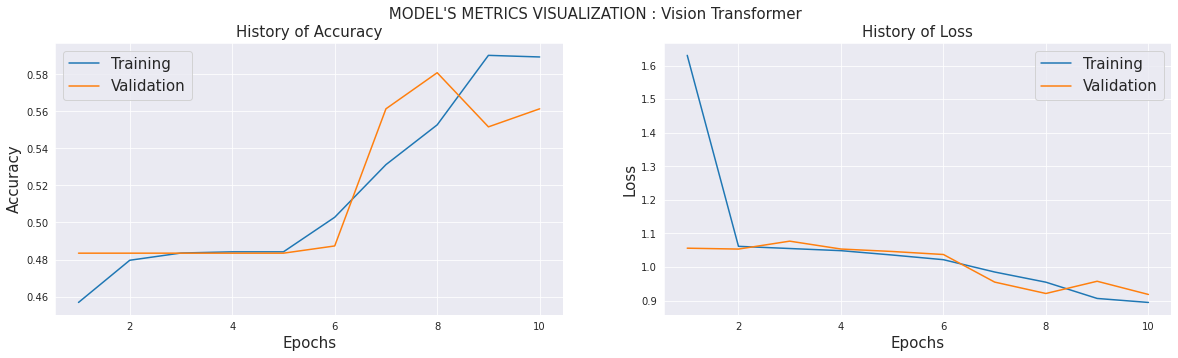

In [ ]:
path = "Vit/loss_acc_1.png"
title = " MODEL'S METRICS VISUALIZATION : Vision Transformer "
Eval_Plot(
    history.history['accuracy'],history.history['val_accuracy'],
    history.history['loss'],history.history['val_loss'],
    path, title
)

In [ ]:
X_test = vit.preprocess_inputs(X_test)

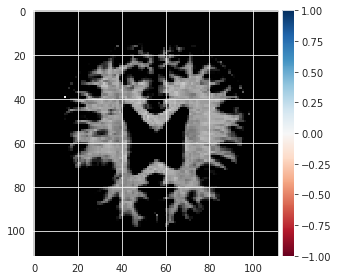

In [ ]:
imshow(X_test[0])

In [ ]:
prediction_prob = model.predict(X_test)
y_pred = np.argmax(prediction_prob, axis = 1)
y_pred = y_pred.reshape(-1, 1).copy()
class_Names = list(testing_data.class_indices.keys())

In [ ]:
print(f"Y prediction shape : {y_pred.shape}")
print(f"Y test shape : {y_test.shape}")
print(f"Raw prediction shape : {prediction_prob.shape}")
print(f"class Names : {class_Names}")

Y prediction shape : (1279, 1)
Y test shape : (1279, 1)
Raw prediction shape : (1279, 4)
class Names : ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


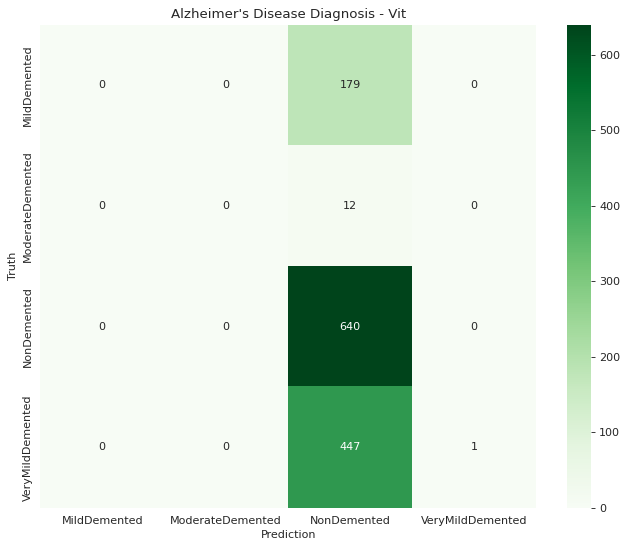

In [ ]:
Confusion_Matrix_Heatmap(y_test, y_pred, class_Names, f"Vit/HeatMap.jpeg", "Vit")

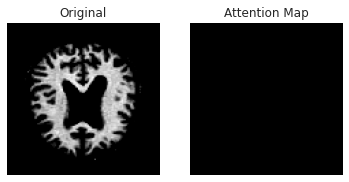

In [ ]:
from vit_keras import vit, utils, visualize

image = X_test[3]
attention_map = visualize.attention_map(model=model, image=image)
#print('Prediction:', model.predict(image)[np.newaxis][0].argmax())

# Plot results
fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.axis('off')
ax2.axis('off')
ax1.set_title('Original')
ax2.set_title('Attention Map')
_ = ax1.imshow(image)
_ = ax2.imshow(attention_map)